In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the datasets
client = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/client.csv')
gs_prices = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/gas_prices.csv')
electricity_prices = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/electricity_prices.csv')
train = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/train.csv')
historical_weather = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/historical_weather.csv')
forecast_weather = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/forecast_weather.csv')
weather_station_to_county = pd.read_csv('C:/sourceee/Energy-Prediction/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv')


In [4]:
print("Client Data:")
client.head()

Client Data:


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [5]:
print("Gas Prices Data:")
gs_prices.head()

Gas Prices Data:


,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [6]:
print("Electricity Prices Data:")
electricity_prices.head()

Electricity Prices Data:


,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
print("Train Data:")
train.head()

Train Data:


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [8]:
print("Historical Weather Data:")
historical_weather.head()

Historical Weather Data:


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [9]:

print("Forecast Weather Data:")
forecast_weather.head()

Forecast Weather Data:


,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


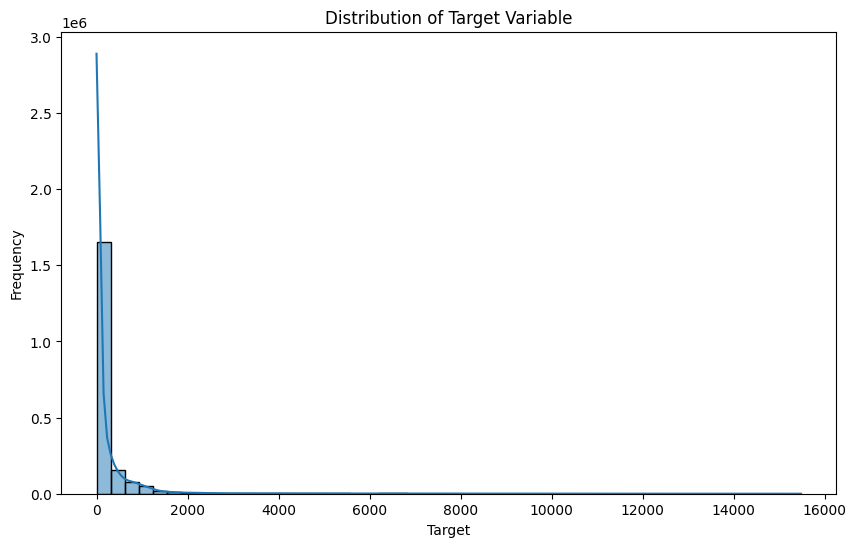

In [10]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

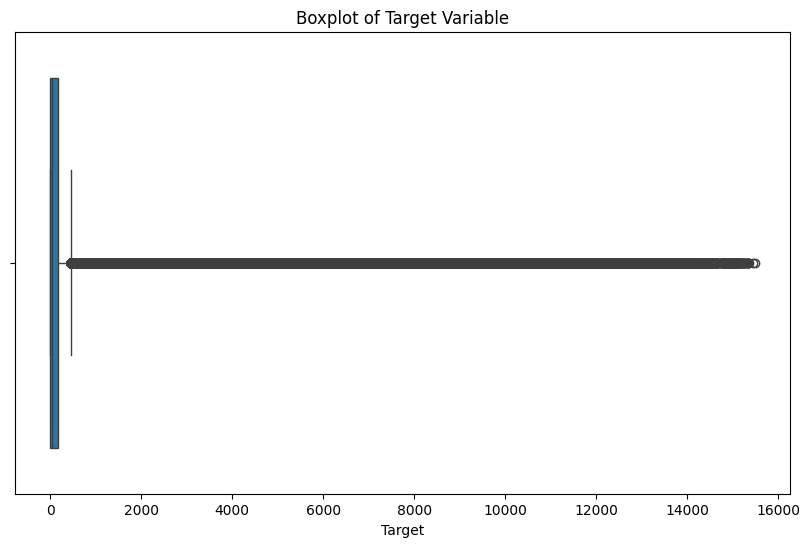

In [11]:
# Boxplot of target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['target'])
plt.title('Boxplot of Target Variable')
plt.xlabel('Target')
plt.show()

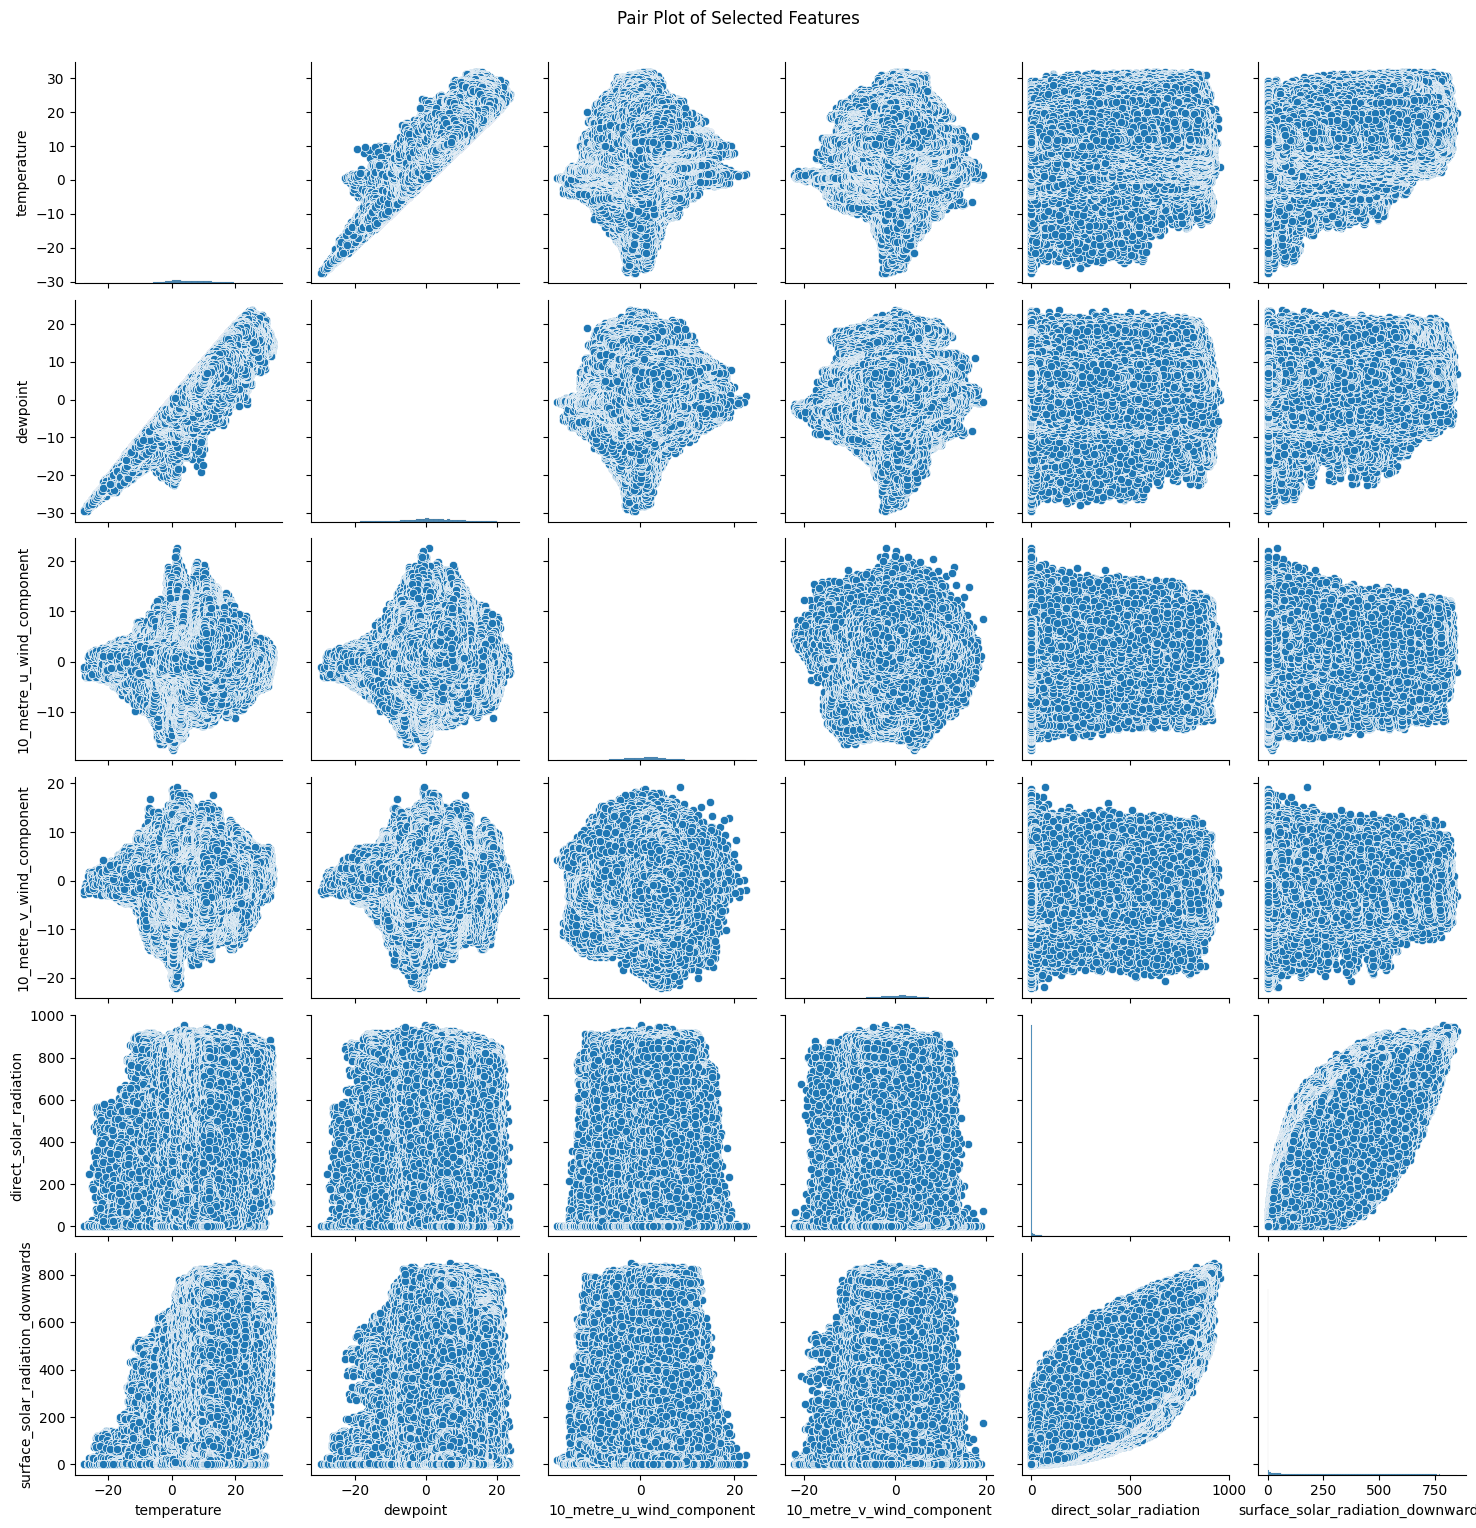

In [12]:
# Pair plot of selected features
sns.pairplot(forecast_weather[['temperature', 'dewpoint', '10_metre_u_wind_component', '10_metre_v_wind_component', 'direct_solar_radiation', 'surface_solar_radiation_downwards']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [13]:
# Check the columns in the train DataFrame
print(train.columns)


Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')


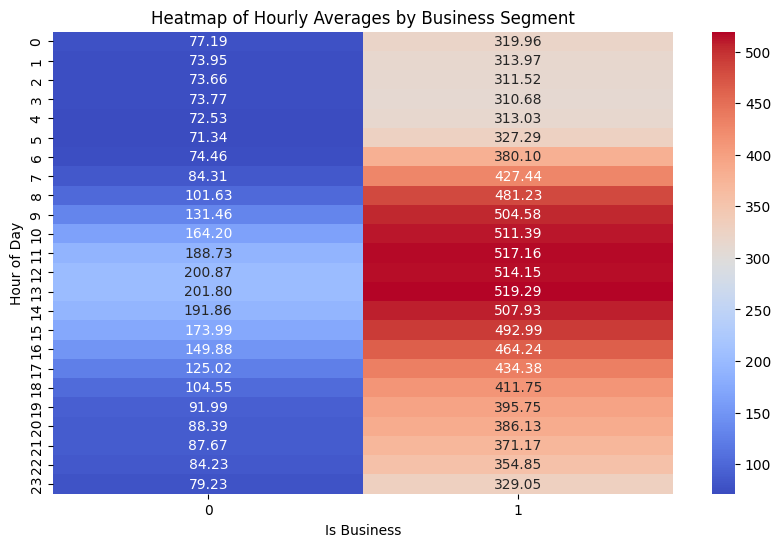

In [4]:
# Ensure the datetime column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract hour from datetime
train['hour'] = train['datetime'].dt.hour

# Compute average target by hour and business segment
hourly_avg = train.groupby(['hour', 'is_business'])['target'].mean().unstack()

# Plot heatmap of hourly averages
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_avg, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Hourly Averages by Business Segment')
plt.xlabel('Is Business')
plt.ylabel('Hour of Day')
plt.show()

In [5]:
# Aggregated statistics by is_business
business_stats = train.groupby('is_business')['target'].agg(['mean', 'median', 'std']).reset_index()
print("Aggregated Statistics by Business Segment:")
print(business_stats)

# Aggregated statistics by product_type
product_type_stats = train.groupby('product_type')['target'].agg(['mean', 'median', 'std']).reset_index()
print("Aggregated Statistics by Product Type:")
print(product_type_stats)

Aggregated Statistics by Business Segment:
   is_business        mean  median          std
0            0  115.291266  18.505   362.678191
1            1  412.527347  59.218  1177.492089
Aggregated Statistics by Product Type:
   product_type        mean    median          std
0             0  238.022372  121.6635   331.009276
1             1   88.733616   18.7340   204.159858
2             2   19.602466    4.8925    41.645136
3             3  481.010672   74.6760  1295.576297
